# **Project Name**    - Ted Talks View Predication



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Sudarshan Karn

# **Project Summary -**

TED (Technology, Entertainment, Design) Talks are short, powerful talks on a wide range of topics. They're given by experts or people with unique experiences. These talks aim to inspire, inform, and entertain.
The goal of this project is to build a predictive model that can estimate the number of views a TED Talk video might receive.
 To achieve this, we follow a structured approach:
 1. we will use the ted talk view dataset
 2. then will preprocess the data to clean and organize to handle missing value and duplicates
 3. then we will check for the relevant features for the regression model
 4. after training the model we will also predict the test valus
 5. once model is ready, we will evaluate it perfomance metrics
 6. Apart from this we will also use the charts and visualization to better understand the model predications


# **GitHub Link -**

https://github.com/Skarnix/Ted_Talks

# **Problem Statement**


**The project overviews the challenge of predicting the number of views that TED Talk videos are likely to receive.Despite the popularity of TED Talks, understanding the factors influencing thier viewership remains complex.
The Objective of this project is to devlop a machine learning regression model that can accurately estimate the views based on various features such as avearge views , recorded date,events , languages, comments ,duration and topics. This predictive model aims to contribute valuable insights into the dynamics of TED Talk interviewship,so that content creators and organizers to anticipate and potentially enhance the impact of their presentations.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
path='/content/drive/MyDrive/Colab Notebooks/data_ted_talks.csv'
data = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
row_num = data.shape[0]
col_num= data.shape[1]
print(f'the dataset has',row_num,'rows and ',col_num, 'columns')

the dataset has 4005 rows and  19 columns


### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

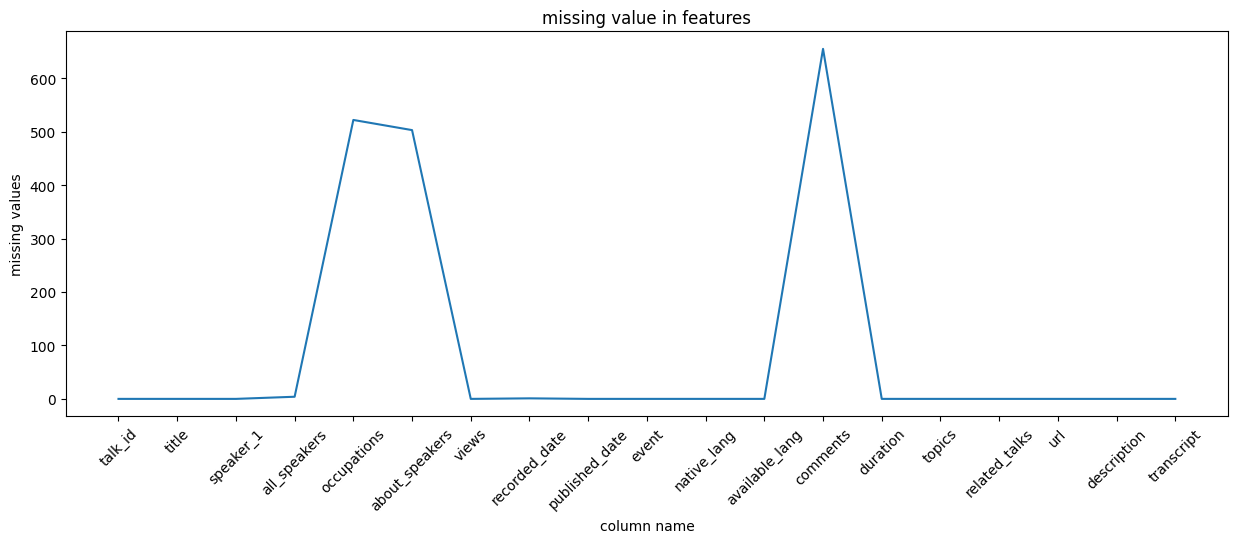

In [9]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
plt.title('missing value in features')
plt.xticks(rotation=45)
plt.xlabel('column name')
plt.ylabel('missing values')
plt.plot(data.columns,data.isnull().sum())
plt.show()

### What did you know about your dataset?

The dataset contains **4005 rows** and  **19 columns** and
So as we have looked into the dataset to gain information about the missing values and duplicāted values. There are ***no duplicated values***  in the entire dataset however there are some missing values in the columns
* **4 missing values** in the "all_speakers" column.
* **522 missing values** in the "occupations" column.
* **503 missing values** in the "about_speakers" column.
* **1 missing value** in the "recorded_date" column.
* **655 missing values** in the "comments" column.



## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [13]:
data.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


### Variables Description

The datasēt contains  19 columns in it.Ḥere is the detailed description of the columns :-  

1. talk_id : Unique identifir for each TED Talk
2. title : Title of the TED Talk
3. speaker_1 : Name of the primary speaker for the talk.
4. all_speakers: Ṇame of all the speakers involved in the talk.
5. occupations : Occupations of the speaker
6. about_speakers : Information or details about the speakers
7. views : Number of views  ṬED talk has recieved
8. recorded_date : Date when the talk was recorded
9. published_date : Date when the talk was published
10. event : Event or occasion where the talk took place.
11. native_lang : Native language of the speakers
12. available_lang : Languages in which the talk is available
13. comments : Number of comments on the TED Talk
14. duration : Duration of the talk in minutes
15. topics: Topics or themes covered in the talk
16. related_talks: ID of related talks
17. url: URL link to the TED talk
18. description : Brief description of the talk
19. transcript : Text transcript of the talk



In [14]:
data.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
data.nunique()

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

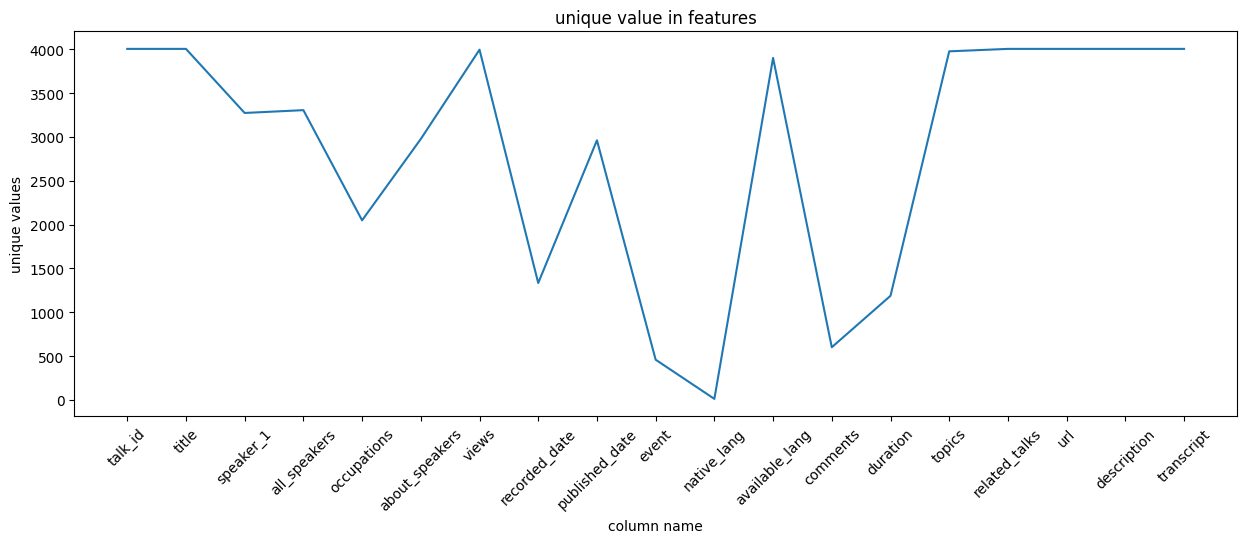

In [16]:
# Visualizing the unique values
plt.figure(figsize=(15,5))
plt.title('unique value in features')
plt.xticks(rotation=45)
plt.xlabel('column name')
plt.ylabel('unique values')
plt.plot(data.columns,data.nunique())
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
#lets drop some missing value rows also
missing_rows_col = ['all_speakers','recorded_date','published_date']
data.dropna(subset=missing_rows_col,inplace=True)
data.shape

(4000, 19)

In [18]:
data['num_available_lang'] = data['available_lang'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)
data.drop(columns=['available_lang'],inplace=True)
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,comments,duration,topics,related_talks,url,description,transcript,num_available_lang
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",43
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",49
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",26
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,35
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,62


In [19]:
data['recorded_date']=pd.to_datetime(data['published_date'])
data['published_date']=pd.to_datetime(data['recorded_date'])
def mon_convertor(date):
  return date.strftime('%b') if pd.notna(date) else None

data['recorded_date']=data['recorded_date'].apply(mon_convertor)
data['published_date']=data['published_date'].apply(mon_convertor)


In [20]:
data['published_date'].value_counts()

Apr    423
Mar    417
Feb    412
Oct    349
Jan    347
Sep    346
May    312
Jun    310
Nov    305
Jul    278
Dec    265
Aug    236
Name: published_date, dtype: int64

In [21]:
# Define the mean duration
mean_duration = data['duration'].mean()

# Create a new column 'video_category' based on mean duration
data['video_category'] = pd.cut(data['duration'], bins=[0, mean_duration, float('inf')], labels=['Short', 'Long'], right=False)

# Display the updated DataFrame
data['video_category'].value_counts()

Long     2053
Short    1947
Name: video_category, dtype: int64

### What all manipulations have you done and insights you found?

To streamline our dataset and focus on features most relevant to predicting the number of views, we've made some strategic decisions. Specifically, we've dropped certain columns – 'about_speakers', 'related_talks', 'url', 'description', 'transcript', and 'occupations' – as they were deemed less crucial for our analysis.

Additionally, we've removed rows with missing values in the 'all_speakers' and 'recorded_date' columns. While the 'comments' column has numerous missing values, we've chosen to retain it. The decision is taken in the understanding that removing rows with missing comments might lead to a significant loss of valuable information, given the potential presence of other essential data in those rows. Thus, the 'comments' column has been retained despite its missing values, recognizing its potential significance in the overall analysis.
Apart from this, we have changed the format of the columns recorded date and published date to 'mmm' format for convenience.
We have also converted the duration column to a categorical column by dividing them into two categories - short and long videos .


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-22-fef7177e1890>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video_category', y='views', data=data, palette='viridis')


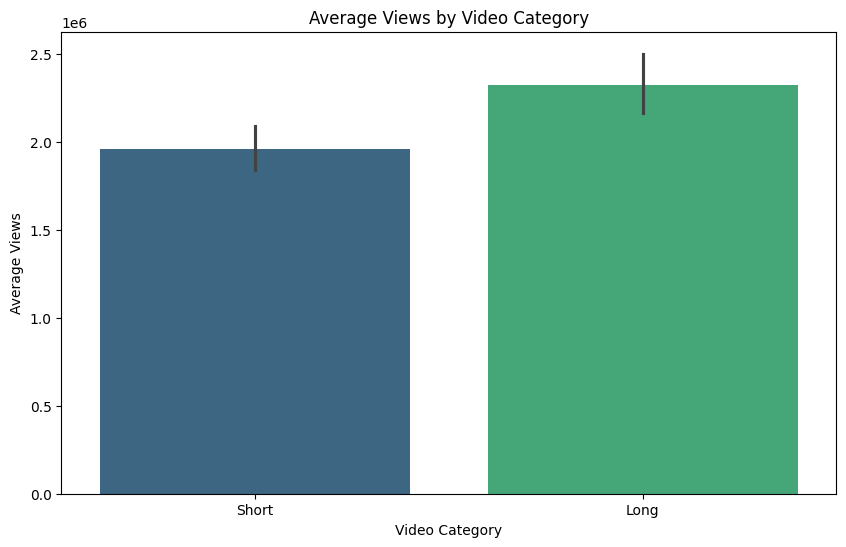

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='video_category', y='views', data=data, palette='viridis')
plt.title('Average Views by Video Category')
plt.xlabel('Video Category')
plt.ylabel('Average Views')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart helps us easily visualize the differnece between the values of two categorical variables relation with a views numerical variable.


##### 2. What is/are the insight(s) found from the chart?

As per the graph , we can see that the average view of long videos are higher than the short videos . Apart from this we can also see that the number of videos published by the Ted talks are mostly long videos

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can guide businesses in optimizing their content strategy by prioritizing the creation of concise and impactful videos. By aligning content with viewer preferences for longer durations, businesses can enhance audience engagement, increase retention rates, and foster positive viewer experiences.

#### Chart - 2

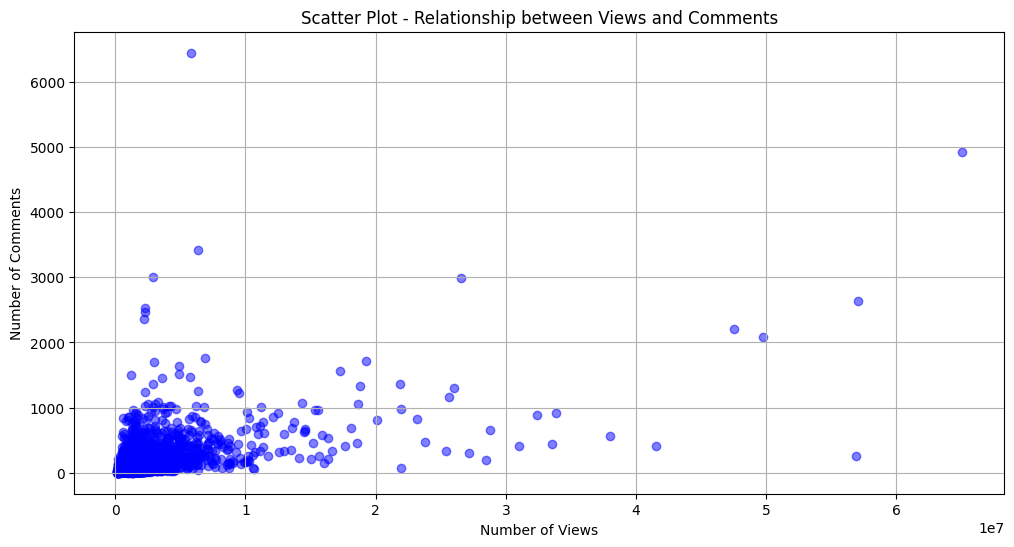

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(data['views'], data['comments'], alpha=0.5, color='blue')
plt.title('Scatter Plot - Relationship between Views and Comments')
plt.xlabel('Number of Views')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Same as the above graph even on this one we can see that the number of comments and the number of views are more dense toward bottom left which means the number of views are mostly below one million and the comments are also on an average of a thousand. we also observe a very wide spread of data, maybe its because there are very videos with very high number of views and comments


##### 2. What is/are the insight(s) found from the chart?

The scatter plot reveals a concentration of TED Talk videos with moderate views and comments, suggesting a typical engagement pattern. Outliers with exceptionally high views and comments provide opportunities for businesses to identify successful content strategies.As we can see that the number of comments are not increasing with the increase in views which may impact the enangement of viewer in the content

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can contribute to a positive business impact. Understanding the engagement patterns and concentration of views and comments in TED Talk videos allows businesses to tailor their content, marketing, and engagement strategies more effectively.

#### Chart - 3

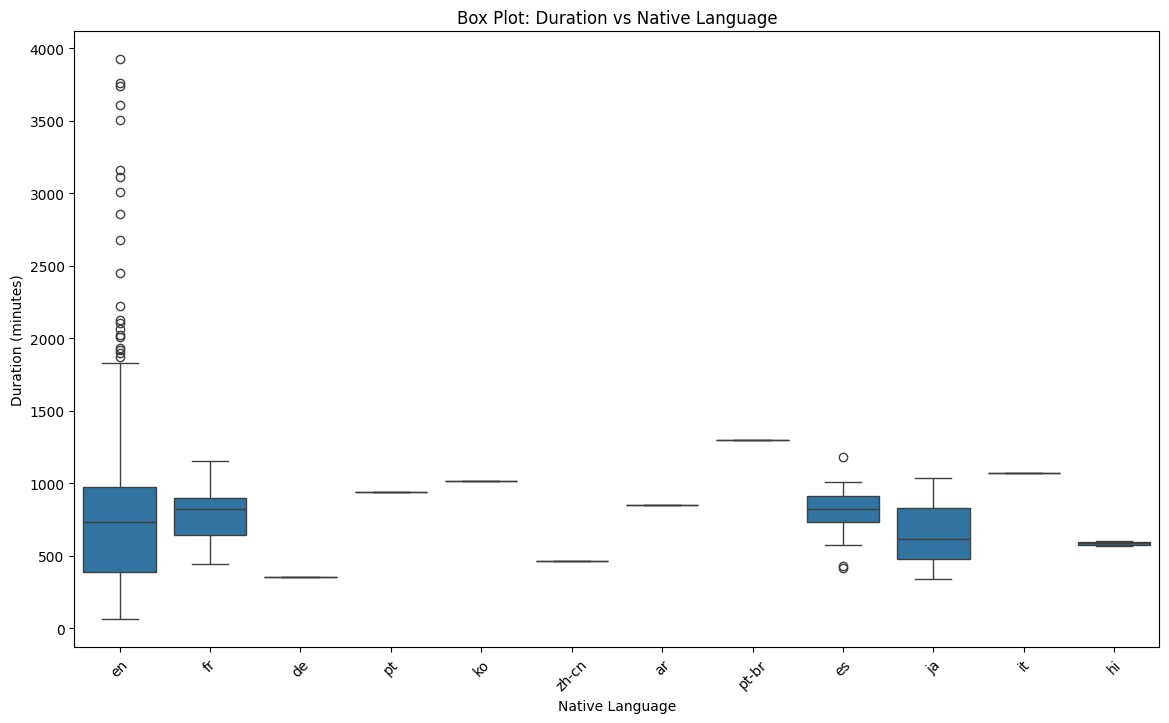

In [24]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='native_lang', y='duration', data=data)
plt.title('Box Plot: Duration vs Native Language')
plt.xlabel('Native Language')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

##### 1. Why did you pick the specific chart?

 In the boxplot each box represents the distribution of durations for talks in a specific native language. Box plots are clear and concise, making it easy to interpret the central tendency and spread of durations within each language category.

##### 2. What is/are the insight(s) found from the chart?

As we can see in the graph that there is high number of videos that are made in english language and have received a good amount of watch time . However there are also some videos in spanish and french language that have recevied good watchtime minutes .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the graph, showcasing high watch time for English-language videos and substantial watch time for Spanish and French videos, can benefit businesses. It highlights language preferences and potential audience engagement. However, a negative impact may occur if content diversification is neglected, limiting outreach to non-English speakers. Businesses should consider multilingual content strategies for broader market reach.

#### Chart - 4

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.boxplot(x=data['published_date'], y=data['views'], color='b', showfliers=False)  # Assuming you want to exclude outliers
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Number of Views vs Published Date')
plt.xlabel('Published Date')
plt.ylabel('Number of Views')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot chart is a good way to show case the central tendancy , spreads and outliers in the dataset.it makes more ease to understand the high and low of the valuesof each month


##### 2. What is/are the insight(s) found from the chart?

it seems that the first quarter from febuary to may Ted talks usually gets more view than rest of the months. Maybe in the summer people prefer to spend more time on screen which is why we are seeing spike in the views

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing the trends in views over time can provide valuable information for content creators and event organizers.The timing of major events or conferences could also influence the popularity of TED talks during specific months .

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Count the frequency of each month
month_frequency = data['published_date'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
month_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Published Months')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a suitable choice for showcasing monthly view comparisons, providing an easily interpretable and visually effective representation of the data.

##### 2. What is/are the insight(s) found from the chart?

Typically, TED Talks exhibit a notable trend of higher video production during the first quarter, specifically from February to May, compared to the subsequent months. This pattern suggests a concentrated effort or heightened activity in content creation during the early months of the year, potentially influenced by strategic planning, event schedules, or organizational priorities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact is expected as the correlation between available languages and views suggests broader reach. However, indiscriminate language expansion may lead to diminishing returns, diluting resources and affecting translation quality. This could result in negative growth if translation costs outweigh additional views. Striking a balance is crucial for optimizing business impact while avoiding negative consequences.

#### Chart - 6

In [ ]:
views_by_lang_count = data.groupby('num_available_lang')['views'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='num_available_lang', y='views', data=views_by_lang_count, color='skyblue')
plt.title('Average Views by Number of Available Languages')
plt.xlabel('Number of Available Languages')
plt.xticks(rotation=45)
plt.ylabel('Average Views')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is a great way to visulaize the trend of the data when there are mulitple variables and we need to showcase relation to a numerical variable

##### 2. What is/are the insight(s) found from the chart?

The trend in the data suggests a consistent rise in views as the number of available languages increases. This pattern indicates that a broader language availability contributes to reaching a more diverse audience, potentially leading to a higher view count for the TED Talks.

#####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights suggest a positive correlation between the number of available languages and views, indicating potential for increased audience reach. This could positively impact the business by enhancing global visibility and engagement. However, there's a need for cautious expansion, as indiscriminate language additions might lead to diminishing returns and resource dilution, potentially impacting content quality.

#### Chart - 6 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 7 - Pair Plot

In [ ]:
# Pair Plot visualization code
selected_features = ['views', 'duration', 'comments']

# Subset the DataFrame
subset_data = data[selected_features]

# Create a pair plot
sns.pairplot(subset_data)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Certainly! Here are three hypothetical statements based on the dataset:

1. **Hypothesis 1: month  Impact on Views**
   - **Statement:** TED Talks hosted at specific month events garner higher views compared to others.
   - **Reasoning:** Certain events may attract more attention or have a larger audience, influencing the number of views a talk receives.

2. **Hypothesis 2: Duration and Engagement**
   - **Statement:** The duration of a TED Talk correlates with audience engagement, as measured by the number of comments.
   - **Reasoning:** Longer talks might have more in-depth content, potentially leading to increased viewer engagement and subsequent comments.

3. **Hypothesis 3: Published Language Influence**
   - **Statement:** Talks published in languages spoken by a larger audience tend to accumulate more views.
   - **Reasoning:** Talks available in widely spoken languages might have a broader appeal, attracting a larger viewership.

These are hypothetical statements, and to test or validate them, you would need to perform statistical analyses or exploratory data analysis on your dataset. If you have specific hypotheses in mind or if there's a particular aspect you'd like to explore further, feel free to let me know!

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null hypothesis(H0)- The average number of views is same for all month

alternate hypothesis(H1) - At least one mean is different

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway
months =data['published_date'].unique()
month_views=[data[data['published_date']==month]['views'] for month in months]

f_stats,p_value = f_oneway(*month_views)
print(f'p_value: {p_value:.3f}')

if p_value<= 0.05:
  print("null hypothesis REJECTED")
else:
  print("Fail to reject null hypothesis")

##### Which statistical test have you done to obtain P-Value?

ANOVA test

##### Why did you choose the specific statistical test?

ANOVA is a formal statistical test and it can be applied when comparing means across multiple groups like in this case we had to compare the means in views as well as month column data

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(H0)- the average number of comments are same on both length of videos(Short and Long)

Alternate Hypothesis (H1)- Atleast one of the type of video has not the same number of comments

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
short_comments = data[data['video_category']=='Short']['comments'].dropna()
long_comments =data[data['video_category']=='Long']['comments'].dropna()
t_stats,p_value = ttest_ind(short_comments,long_comments,equal_var=False)
print(f'p_value: {p_value}')

if p_value<= 0.05:
  print("null hypothesis REJECTED")
else:
  print("Fail to reject null hypothesis")

##### Which statistical test have you done to obtain P-Value?

ttest_ind

##### Why did you choose the specific statistical test?

we wanted to compare the mean number of comments between two categories ,"short" and "long" videos . The ttest is appropriate in this scenario because it is designed to compare means of two independent groups .

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null hypothesis(H0)- the number of available language for the video does not have a significant effect on the mean of views.

alternative hypothesis(H1)- the number of available language has significant effect on the mean number of views

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import linregress
num_avail_languages=data['num_available_lang']
views=data['views']

slope,intercept,r_value,p_value,std_err=linregress(num_avail_languages,views)
print(f'p-value:{p_value}')

if p_value<= 0.05:
  print("null hypothesis REJECTED")
else:
  print("Fail to reject null hypothesis")

##### Which statistical test have you done to obtain P-Value?

lingress


##### Why did you choose the specific statistical test?

Linregress test is chosen in this case as it helps us to perform the simple linear regression analysis which is suitable for these two variables as both are numerical data type .

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#checking columns for null values
data.isnull().sum()

In [ ]:
# Handling Missing Values & Missing Value Imputation
#data['comments].fillna(0,inplace=True)
#data['comments].fillna(data['comments'].mean(),inplace=True) :=162.51
data['comments'].fillna(method='ffill', inplace=True)

In [ ]:
data['comments'].value_counts()

In [ ]:
data['occupations'].fillna(data['occupations'].mode(),inplace=True)

In [ ]:
data.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

I tried various techniques to handle missing values in the dataset. Initially, for column comments ,I attempted to substitute NaN values with zero. However, due to a significant number of missing values (651), setting them all to zero resulted in an imbalanced dataset. Subsequently, I explored filling the NaN values with the mean of the column. Upon realizing that the data range spans from 08 to 1336, and the mean is 162.51, using the mean for all 651 missing values would introduce imbalance. Therefore, I opted for the forward-filling method, as it mitigates the imbalance observed with other approaches.

for other column like occupations, i have replaced the nan values with the most frequent occupations assuming the trend of the occupation in the area

for about speaker column , i have dropped the nan values


### 2. Handling Outliers

In [ ]:
data.describe()

In [ ]:
data.shape

In [ ]:
# Handling Outliers & Outlier treatments
from scipy.stats.mstats import winsorize
column_to_handle=['duration','comments']
winsorizing_factor = 0.05
for col in column_to_handle:
  data[col]=winsorize(data[col],limits=(winsorizing_factor,winsorizing_factor))
data.describe()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We opted for the winsorize method to address outliers. Upon examination, we observed a notably high standard deviation in the 'comments' and 'duration' columns. To mitigate this without discarding valuable information from high-value inputs, we chose the winsorize method. While initially considering the traditional approach of calculating the interquartile range and removing outliers, we recognized that this method would completely erase the high values from the dataframe. Consequently, we favored the winsorize method to strike a balance between reducing standard deviation and retaining significant data points.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
data['video_category'].replace({'short':0,'long':1},inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used the replacement technique to encode the categorical variable as it has only two category :'long','short' . hence just replaced them with 0,1

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
data['native_lang'].value_counts()

In [ ]:
# Expand Contraction
language_mapping = {'en': 'english', 'es': 'spanish', 'fr': 'french', 'ja': 'japanese',
                    'hi': 'hindi', 'de': 'german', 'pt': 'portuguese', 'ko': 'korean',
                    'zh-cn': 'chinese', 'ar': 'arabic', 'pt-br': 'brazilian portuguese', 'it': 'italian'}
data['native_lang']=data['native_lang'].replace(language_mapping)

In [ ]:
data['native_lang'].value_counts()

#### 2. Lower Casing

In [ ]:
# Lower Casing
columns=['title','speaker_1','recorded_date','published_date','event','video_category']
for col in columns:
  data[col]=data[col].str.lower()

#### 3. Removing Punctuations

In [ ]:
for column_to_check in data.columns:
    # Convert the column to string type
    data[column_to_check] = data[column_to_check].astype(str)

    # Check if the column contains any data values with punctuation
    has_punctuation = data[column_to_check].str.contains(r'[^\w\s]', na=False).any()

    # Print the result for each column
    if has_punctuation:
        print(f"The {column_to_check} column contains data values with punctuation.")
    else:
        print(f"The {column_to_check} column does not contain data values with punctuation.")


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
data.drop('url',inplace=True,axis=1)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
data.drop('transcript',axis=1,inplace=True)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
data.drop('description',axis=1,inplace=True)

In [ ]:
data.head(1)

#### 7. Tokenization

In [ ]:
# Tokenization


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***